In [25]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [29]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip -o cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/c

In [53]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de imágenes para train, validation y test
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Ruta base del dataset
base_dir = './cats_and_dogs'

# Altura y ancho de las imágenes
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Generadores de datos
train_data_gen = train_image_generator.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=f"{base_dir}/validation",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=f"{base_dir}/test",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [54]:

# 4. Crear el modelo CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria: gato o perro
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:

# 5. Entrenar el modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Re-creamos el generador de imágenes con aumento de datos
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,           # Rotaciones aleatorias de hasta 40 grados
    width_shift_range=0.2,       # Desplazamiento horizontal
    height_shift_range=0.2,      # Desplazamiento vertical
    shear_range=0.2,             # Transformación de corte
    zoom_range=0.2,              # Zoom aleatorio
    horizontal_flip=True,        # Volteo horizontal
    fill_mode='nearest'          # Cómo rellenar los píxeles vacíos tras transformaciones
)

# Aplicamos el nuevo generador a los datos de entrenamiento
train_data_gen = train_image_generator.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)




Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


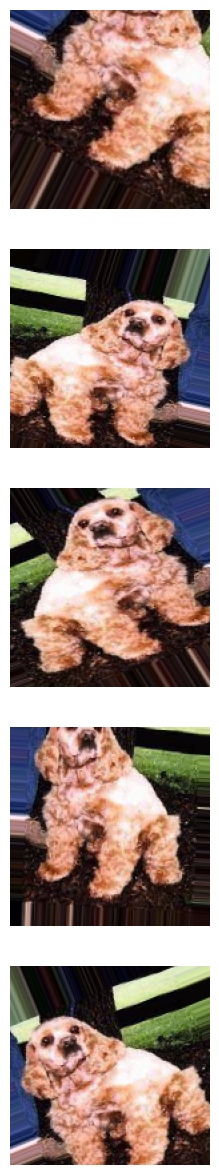

In [56]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [58]:

# 7. Crear el modelo CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definimos el modelo secuencial
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binaria: gato o perro
])

# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [ ]:

# 8. Entrenar el modelo con los generadores

EPOCHS = 10  # Puedes subir a 15 o 20 si quieres mejor resultado

history = model.fit(
    train_data_gen,
    steps_per_epoch=2000 // BATCH_SIZE,  # total imágenes entre tamaño del batch
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=1000 // BATCH_SIZE  # igual que arriba, para validación
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5042 - loss: 1.2045 - val_accuracy: 0.5242 - val_loss: 0.6901
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5116 - loss: 0.6918 - val_accuracy: 0.5897 - val_loss: 0.6842
Epoch 3/10
 2/62 ━━━━━━━━━━━━━━━━━━━━ 6:48 7s/step - accuracy: 0.5781 - loss: 0.6853  

In [ ]:

# 9. Visualizar precisión y pérdida del modelo

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida durante el entrenamiento')

plt.tight_layout()
plt.show()


Saving gato.jpg to gato (2).jpg


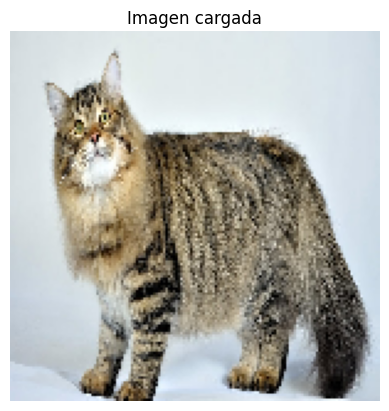

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Probabilidad de ser perro (1): 0.62
👉 Es un perro 🐶


In [47]:

from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Subir imagen desde tu computador
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = next(iter(uploaded))

# Tamaño usado en el entrenamiento
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Cargar imagen y prepararla
img = image.load_img(file_name, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Mostrar imagen
plt.imshow(img)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()

# Predicción
prediction = model.predict(img_array)[0][0]
print(f"Probabilidad de ser perro (1): {prediction:.2f}")

# Interpretación
if prediction > 0.5:
    print("👉 Es un perro 🐶")
else:
    print("👉 Es un gato 🐱")



In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


In [49]:
# Cargar modelo preentrenado
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Cargar modelo de ImageNet
model = MobileNetV2(weights='imagenet')
print("✅ Modelo cargado correctamente")


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Modelo cargado correctamente


Saving gato.jpg to gato (3).jpg


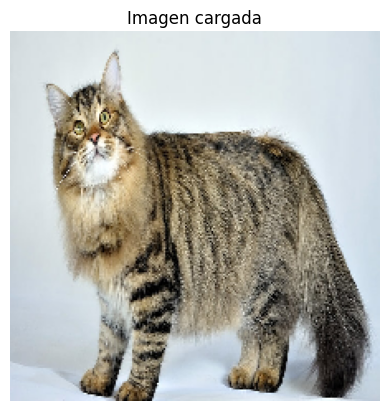

In [50]:
# Subir la imagen desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
for file_name in uploaded.keys():
    img_path = file_name

# Cargar y mostrar la imagen
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()

# Convertir la imagen a array para el modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [52]:
# Hacer la predicción con el modelo
prediction = model.predict(img_array)

# Decodificar la predicción
decoded = decode_predictions(prediction, top=1)[0][0]
label = decoded[1]
confidence = decoded[2]

# Mostrar resultados
print(f"🔍 Predicción: {label} ({confidence*100:.2f}%)")

# Listas de etiquetas posibles de gatos y perros según ImageNet
gato_labels = ["tabby", "tiger_cat", "Persian_cat", "Siamese_cat", "Egyptian_cat"]
perro_labels = ["Chihuahua", "Labrador_retriever", "German_shepherd", "beagle", "pug", "golden_retriever", "Maltese_dog", "Pomeranian"]

if label in gato_labels:
    print("✅ Es un gato 🐱")
elif label in perro_labels:
    print("✅ Es un perro 🐶")
else:
    print("❓ No es claramente un gato ni un perro")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
🔍 Predicción: tabby (73.15%)
✅ Es un gato 🐱
